In [3]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50

In [9]:
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout

# Load pre-trained ResNet-50 model
pretrained_model = ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Freeze the weights of the pre-trained layers
for layer in pretrained_model.layers:
    layer.trainable = False

num_classes = 5    
    
# Add custom classification layers
x = pretrained_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)  # Adding dropout for regularization
predictions = Dense(num_classes, activation='softmax')(x)  # Assuming num_classes is defined

# Create the final custom model
custom_model = tf.keras.Model(inputs=pretrained_model.input, outputs=predictions)

# Compile the model
custom_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
custom_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 134, 134, 3)          0         ['input_4[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 64, 64, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 64, 64, 64)           256       ['conv1_conv[0][0]']          
 on)                                                                                        

                                                                                                  
 conv2_block3_1_conv (Conv2  (None, 32, 32, 64)           16448     ['conv2_block2_out[0][0]']    
 D)                                                                                               
                                                                                                  
 conv2_block3_1_bn (BatchNo  (None, 32, 32, 64)           256       ['conv2_block3_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv2_block3_1_relu (Activ  (None, 32, 32, 64)           0         ['conv2_block3_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv2_blo

 ation)                                                                                           
                                                                                                  
 conv3_block2_3_conv (Conv2  (None, 16, 16, 512)          66048     ['conv3_block2_2_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv3_block2_3_bn (BatchNo  (None, 16, 16, 512)          2048      ['conv3_block2_3_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv3_block2_add (Add)      (None, 16, 16, 512)          0         ['conv3_block1_out[0][0]',    
                                                                     'conv3_block2_3_bn[0][0]']   
          

 conv4_block1_2_conv (Conv2  (None, 8, 8, 256)            590080    ['conv4_block1_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv4_block1_2_bn (BatchNo  (None, 8, 8, 256)            1024      ['conv4_block1_2_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block1_2_relu (Activ  (None, 8, 8, 256)            0         ['conv4_block1_2_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv4_block1_0_conv (Conv2  (None, 8, 8, 1024)           525312    ['conv3_block4_out[0][0]']    
 D)       

                                                                                                  
 conv4_block3_out (Activati  (None, 8, 8, 1024)           0         ['conv4_block3_add[0][0]']    
 on)                                                                                              
                                                                                                  
 conv4_block4_1_conv (Conv2  (None, 8, 8, 256)            262400    ['conv4_block3_out[0][0]']    
 D)                                                                                               
                                                                                                  
 conv4_block4_1_bn (BatchNo  (None, 8, 8, 256)            1024      ['conv4_block4_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_blo

 D)                                                                                               
                                                                                                  
 conv4_block6_3_bn (BatchNo  (None, 8, 8, 1024)           4096      ['conv4_block6_3_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block6_add (Add)      (None, 8, 8, 1024)           0         ['conv4_block5_out[0][0]',    
                                                                     'conv4_block6_3_bn[0][0]']   
                                                                                                  
 conv4_block6_out (Activati  (None, 8, 8, 1024)           0         ['conv4_block6_add[0][0]']    
 on)                                                                                              
          

 conv5_block3_1_relu (Activ  (None, 4, 4, 512)            0         ['conv5_block3_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv5_block3_2_conv (Conv2  (None, 4, 4, 512)            2359808   ['conv5_block3_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv5_block3_2_bn (BatchNo  (None, 4, 4, 512)            2048      ['conv5_block3_2_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv5_block3_2_relu (Activ  (None, 4, 4, 512)            0         ['conv5_block3_2_bn[0][0]']   
 ation)   

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_data_dir = r"C:\Users\Trenton\Documents\GitHub\Crops-Capstone-3\crop_images"
test_data_dir = r"C:\Users\Trenton\Documents\GitHub\Crops-Capstone-3\test_crop_image"


img_width, img_height = 128, 128
batch_size = 32

# Create data generator for training
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)


Found 201 images belonging to 5 classes.
Found 45 images belonging to 5 classes.


In [11]:
history = custom_model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
)


C:\Users\Trenton\AppData\Local\Temp\ipykernel_8592\603269989.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = custom_model.fit_generator(


Epoch 1/10
6/6 [==============================] - 6s 548ms/step - loss: 1.8033 - accuracy: 0.1716
Epoch 2/10
6/6 [==============================] - 3s 493ms/step - loss: 1.7525 - accuracy: 0.2071
Epoch 3/10
6/6 [==============================] - 3s 421ms/step - loss: 1.7328 - accuracy: 0.1953
Epoch 4/10
6/6 [==============================] - 3s 420ms/step - loss: 1.6688 - accuracy: 0.2781
Epoch 5/10
6/6 [==============================] - 3s 416ms/step - loss: 1.6532 - accuracy: 0.1538
Epoch 6/10
6/6 [==============================] - 3s 429ms/step - loss: 1.6877 - accuracy: 0.2130
Epoch 7/10
6/6 [==============================] - 3s 426ms/step - loss: 1.6107 - accuracy: 0.2249
Epoch 8/10
6/6 [==============================] - 3s 423ms/step - loss: 1.6662 - accuracy: 0.2130
Epoch 9/10
6/6 [==============================] - 3s 436ms/step - loss: 1.6444 - accuracy: 0.1953
Epoch 10/10
6/6 [==============================] - 3s 425ms/step - loss: 1.6436 - accuracy: 0.1834


In [12]:
test_loss, test_accuracy = custom_model.evaluate_generator(test_generator, steps=test_generator.samples // batch_size)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


C:\Users\Trenton\AppData\Local\Temp\ipykernel_8592\783894594.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_loss, test_accuracy = custom_model.evaluate_generator(test_generator, steps=test_generator.samples // batch_size)


Test Loss: 1.613210916519165
Test Accuracy: 0.125


In [14]:

pretrained_model2 = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the weights of the pre-trained layers
for layer in pretrained_model2.layers:
    layer.trainable = False


x = pretrained_model2.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(num_classes, activation='softmax')(x)

# Create the final custom model
custom_model2 = tf.keras.Model(inputs=pretrained_model2.input, outputs=predictions)

# Compile
custom_model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with initial layers frozen
initial_epochs = 10
history_initial = custom_model2.fit_generator(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=initial_epochs,
)

# Unfreeze some layers for fine-tuning
n_unfreeze = 50  # Number of layers to unfreeze from the top
for layer in custom_model2.layers[-n_unfreeze:]:
    layer.trainable = True

# Compile the model again after unfreezing layers
custom_model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Continue training with fine-tuning
fine_tuning_epochs = 20
history_fine_tuning = custom_model2.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=fine_tuning_epochs,

)


Epoch 1/10


C:\Users\Trenton\AppData\Local\Temp\ipykernel_8592\3919284956.py:23: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_initial = custom_model2.fit_generator(


6/6 [==============================] - 5s 482ms/step - loss: 1.7903 - accuracy: 0.2012
Epoch 2/10
6/6 [==============================] - 3s 420ms/step - loss: 1.6635 - accuracy: 0.2249
Epoch 3/10
6/6 [==============================] - 3s 481ms/step - loss: 1.6761 - accuracy: 0.2396
Epoch 4/10
6/6 [==============================] - 3s 420ms/step - loss: 1.7752 - accuracy: 0.1420
Epoch 5/10
6/6 [==============================] - 3s 427ms/step - loss: 1.6644 - accuracy: 0.2071
Epoch 6/10
6/6 [==============================] - 3s 423ms/step - loss: 1.6786 - accuracy: 0.1953
Epoch 7/10
6/6 [==============================] - 3s 423ms/step - loss: 1.7077 - accuracy: 0.1893
Epoch 8/10
6/6 [==============================] - 3s 422ms/step - loss: 1.6742 - accuracy: 0.1598
Epoch 9/10
6/6 [==============================] - 3s 429ms/step - loss: 1.6654 - accuracy: 0.1893
Epoch 10/10
6/6 [==============================] - 3s 420ms/step - loss: 1.6573 - accuracy: 0.1834


Epoch 1/20


C:\Users\Trenton\AppData\Local\Temp\ipykernel_8592\3919284956.py:39: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_fine_tuning = custom_model2.fit_generator(


6/6 [==============================] - 11s 1s/step - loss: 2.0766 - accuracy: 0.2012
Epoch 2/20
6/6 [==============================] - 6s 1s/step - loss: 1.8771 - accuracy: 0.1538
Epoch 3/20
6/6 [==============================] - 6s 1s/step - loss: 1.6744 - accuracy: 0.2012
Epoch 4/20
6/6 [==============================] - 6s 1s/step - loss: 1.6387 - accuracy: 0.1716
Epoch 5/20
6/6 [==============================] - 7s 1s/step - loss: 1.6206 - accuracy: 0.2135
Epoch 6/20
6/6 [==============================] - 7s 1s/step - loss: 1.6126 - accuracy: 0.2240
Epoch 7/20
6/6 [==============================] - 8s 1s/step - loss: 1.6212 - accuracy: 0.2292
Epoch 8/20
6/6 [==============================] - 7s 1s/step - loss: 1.6279 - accuracy: 0.2189
Epoch 9/20
6/6 [==============================] - 7s 1s/step - loss: 1.6095 - accuracy: 0.2012
Epoch 10/20
6/6 [==============================] - 7s 1s/step - loss: 1.6094 - accuracy: 0.2189
Epoch 11/20
6/6 [==============================] - 7s 1s/st

In [16]:
test_loss, test_accuracy = custom_model2.evaluate(test_generator, steps=test_generator.samples // batch_size)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

1/1 [==============================] - 1s 658ms/step - loss: 1.6142 - accuracy: 0.1562
Test Loss: 1.6141650676727295
Test Accuracy: 0.15625


1/1 [==============================] - 1s 655ms/step


C:\Users\Trenton\AppData\Local\Temp\ipykernel_8592\650584317.py:17: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  incorrectly_classified_indices = np.where(predicted_labels != true_labels)[0]


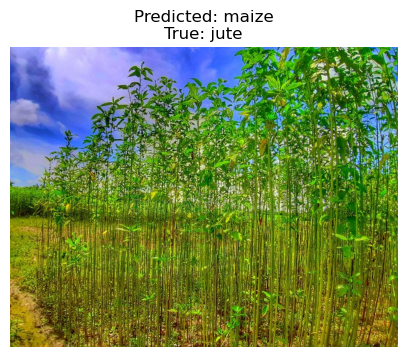

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Get class labels from the generator
class_labels = list(test_generator.class_indices.keys())

# Make predictions on the test set
predictions = custom_model.predict(test_generator, steps=test_generator.samples // batch_size)

# Convert predicted probabilities to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Get true labels from the generator
true_labels = test_generator.classes

# Find indices of incorrectly classified samples
incorrectly_classified_indices = np.where(predicted_labels != true_labels)[0]

# Display multiple misclassified images and their corresponding labels
num_samples_to_display = min(10, len(incorrectly_classified_indices))  # Adjust the number of samples to display
for i in range(num_samples_to_display):
    index = incorrectly_classified_indices[i]
    predicted_label = class_labels[predicted_labels[index]]
    true_label = class_labels[true_labels[index]]
    
    # Load and display the misclassified image
    img_path = test_generator.filepaths[index]
    img = plt.imread(img_path)
    
    plt.figure(figsize=(5, 5))
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_label}\nTrue: {true_label}")
    plt.axis('off')
    plt.show()
